### 휴먼지능정보공학과 201910787 김영서

a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.

b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data

원본 이미지는 다음과 같다.

In [9]:
#image save to file and read from file
import skimage
from skimage import data
from skimage import io

camera = data.camera()
# image pixel data type
camera.dtype

io.imsave('sNp_image.png', camera)
cam = io.imread('sNp_image.png')

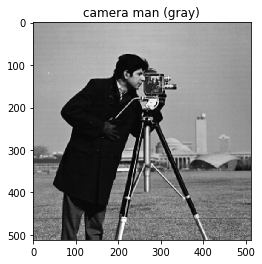

In [10]:
#gray lelvel image display
plt.imshow(cam, cmap=plt.cm.gray)
plt.title("camera man (gray)")
plt.show()

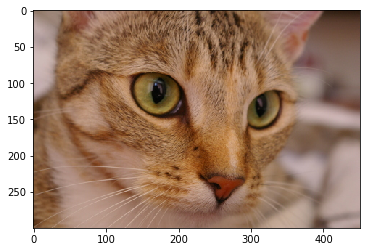

In [11]:
#color images
cat1 = data.chelsea()
plt.imshow(cat1)
plt.show()

a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.

In [18]:
from skimage.exposure import rescale_intensity

def convolve(image, kernel, scale = 1):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = (kW - 1)//2
    output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

    # loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
    for y in np.arange(pad, iH - pad):
        for x in np.arange(pad, iW - pad):
            roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
            output[y-pad, x-pad] = (roi * kernel).sum()*scale

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
 
    # return the output image
    return output

b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.

3x3 Gaussian filter를 이용한 이미지 smoothing한 것은 다음과 같다.

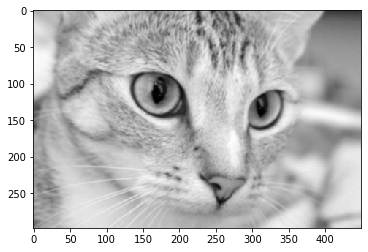

In [19]:
gaussian_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/16)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

7x7 Gaussian filter를 이용한 이미지 smoothingd한 것은 다음과 같다.

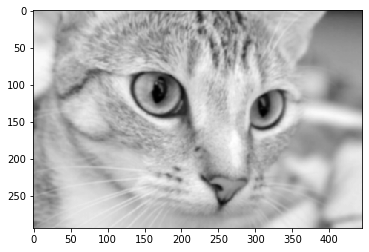

In [20]:
gaussian_7 = np.array((
      [0,0,1,2,1,0,0],
      [0,3,13,22,13,3,0],
      [1,13,59,97,59,13,1],
      [2,22,97,159,97,22,2],
      [1,13,59,97,59,13,1],
      [0,3,13,22,13,3,0],
      [0,0,1,2,1,0,0]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_7, scale = 1/1003)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

3x3 Gaussian filter 처리한 이미지보다 7x7 Gaussian filter 처리한 이미지가 더 smoothing되어서 blurried되었다. 따라서 필터의 크기가 클수록 연산 시간이 길어지고, 선명도는 떨어진다는 것을 알 수 있다.

c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요. 두 가지 경우의 차이점을 설명하세요.

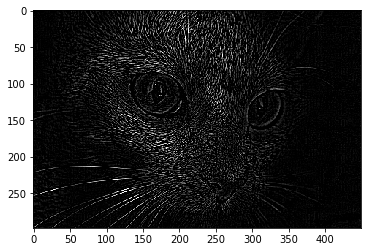

In [21]:
laplacian_3 = np.array((
              [-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]), dtype = "int")

filtered = convolve(cat1[:,:,0], laplacian_3)
plt.imshow(filtered,cmap = plt.cm.gray)
plt.show()

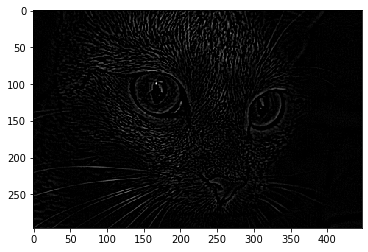

In [23]:
gaussian_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/16)
filtered = convolve(filtered, laplacian_3)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

b)에서 gaussian filtering을 통해 노이즈를 먼저 제거한 후, laplacian filtering을 통해 경계 검출을 수행했기 때문에 후자의 경계가 더 선명한 것을 볼 수 있다.